# Yaygın Kalıplar

## İçeri Atarma İşlemleri

İlk iş olarak aşina olduğumuz `numpy` ve `matplotlib.pyplot` paketlerini içeri aktaralım.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Oluşturacağımız serileri görselleştirmek için hazır bir fonksiyon oluşturalım böylelikle zaman serisi oluştururken nasıl göründüğünü bu işlevi çağırarak kolaylıkla görebiliriz.

In [2]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Zaman")
    plt.ylabel("Değerler")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

## Trend ve Mevsimsellik

Sadece yukarı doğru giden bir zaman serisi oluşturarak başlayalım.

In [4]:
def trend(time, slope=0):
    return slope * time

Oluşturacağımız zaman serisi 4 x 365 + 1 = 1461 birimlik olacaktır.

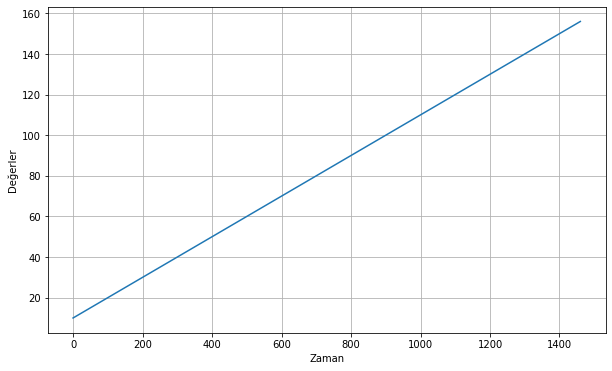

In [5]:
time = np.arange(4 * 365 + 1)
baseline = 10
series = baseline + trend(time, 0.1)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

Zaman ve serideki değerlerimize bir göz atalım.

In [6]:
time

array([   0,    1,    2, ..., 1458, 1459, 1460])

In [7]:
series

array([ 10. ,  10.1,  10.2, ..., 155.8, 155.9, 156. ])

Şimdi de mevsimsel bir desene sahip bir zaman serisi oluşturalım.

In [8]:
def seasonal_pattern(season_time):
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Her periotta aynı kalıbı tekrarlamasını sağlayalım."""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

Genlik (`amplitude`) değerimizi 40 olarak ve period değerimizi 365 olarak ayarladıktan sonta mevsimsel bir desene sahip zaman serimizi oluşturup, görselleştirebiliriz.

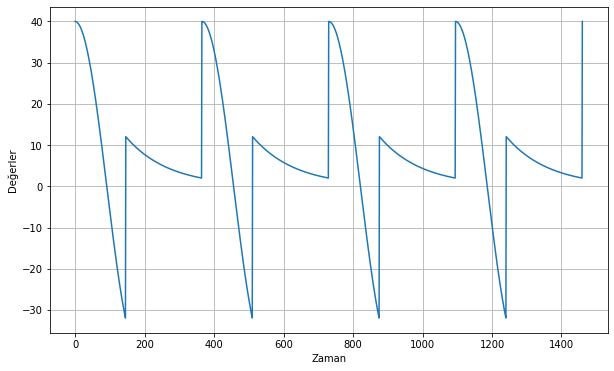

In [9]:
amplitude = 40
series = seasonality(time, period=365, amplitude=amplitude)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

Şimdi de hem tren gem de mevsimsellik içeren bir zaman serisi oluşturalım ve nasıl göründüğüne göz atalım.

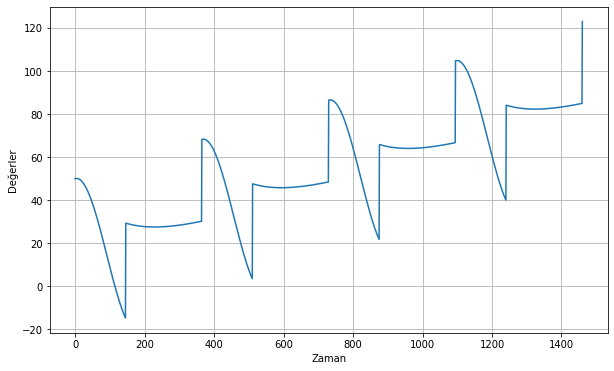

In [10]:
slope = 0.05
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

## Gürültü

Pratikte çok az gerçek zamanlı zaman serisi yukarıdaki gibi düzgün bir sinyala sahiptir. Genellikle biraz gürültüye sahiptirler ve sinyal-gürültü oranı bazen çok düşük olabilir. Şimdi beyaz gürültü (*white noise*) üretelim.

In [11]:
def white_noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

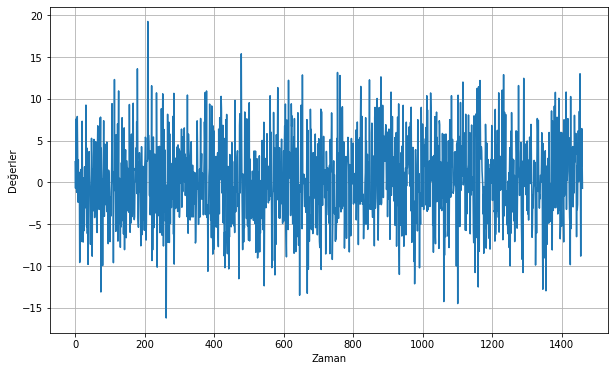

In [12]:
noise_level = 5
noise = white_noise(time, noise_level, seed=42)

plt.figure(figsize=(10, 6))
plot_series(time, noise)
plt.show()

Son olarak yukarıda oluşturduğumuz ve trend + mevsimsellik içeren zaman serimizi gürültü ile birleştirelim ve nasıl bir görüntü ile karşılaşacağımızı görelim.

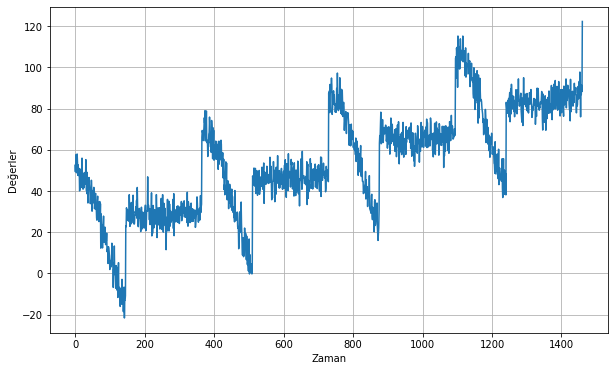

In [13]:
series += noise

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

Evet tam da beklenildiği gibi. Yükselen bir trend, belli periyotlarda aynı deseni tekrarlayan bir mevsimsellik ve elbette biraz beyaz gürültü ile zaman serimizi oluşturduk.

Bu bölüm (Bölüm 8:Zaman Serileri) boyunca yukarıda görüntüsünü gördüğümüz zaman serisi ile çalışacağız. Ve tanımladığımız fonksiyonları tekrar tekrar kullanmak zorunda kalacağız.